In [3]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# Download latest version
path = kagglehub.dataset_download("ankushpanday2/heart-attack-prediction-in-united-states")

print("Path to dataset files:", path)
df = pd.read_csv(path + "/heart_attack_dataset.csv")
df.head()

Path to dataset files: /kaggle/input/heart-attack-prediction-in-united-states


,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome
0,31,Male,194,162,71,22.9,0,1,0,0,...,Yes,Downsloping,1,Normal,0,0,Suburban,Retired,Single,No Heart Attack
1,69,Male,208,148,93,33.9,1,1,0,0,...,Yes,Upsloping,2,Normal,0,0,Suburban,Unemployed,Married,No Heart Attack
2,34,Female,132,161,94,34.0,0,0,1,1,...,Yes,Upsloping,0,Normal,1,0,Rural,Retired,Single,Heart Attack
3,53,Male,268,134,91,35.0,0,1,1,0,...,Yes,Flat,0,Reversible defect,1,0,Suburban,Retired,Widowed,No Heart Attack
4,57,Female,203,140,75,30.1,0,1,0,0,...,Yes,Flat,0,Fixed defect,1,0,Rural,Retired,Married,Heart Attack


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372974 entries, 0 to 372973
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Age                    372974 non-null  int64  
 1   Gender                 372974 non-null  object 
 2   Cholesterol            372974 non-null  int64  
 3   BloodPressure          372974 non-null  int64  
 4   HeartRate              372974 non-null  int64  
 5   BMI                    372974 non-null  float64
 6   Smoker                 372974 non-null  int64  
 7   Diabetes               372974 non-null  int64  
 8   Hypertension           372974 non-null  int64  
 9   FamilyHistory          372974 non-null  int64  
 10  PhysicalActivity       372974 non-null  int64  
 11  AlcoholConsumption     372974 non-null  int64  
 12  Diet                   372974 non-null  object 
 13  StressLevel            372974 non-null  int64  
 14  Ethnicity              372974 non-nu

In [6]:
df.describe()

,Age,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,PhysicalActivity,AlcoholConsumption,StressLevel,Income,MaxHeartRate,ST_Depression,NumberOfMajorVessels,PreviousHeartAttack,StrokeHistory
count,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000
mean,56.975151,199.455844,134.508234,89.495043,29.006733,0.499225,0.500987,0.500973,0.499901,3.003475,2.000048,5.001885,110033.409913,149.463896,2.501799,1.498525,0.496938,0.500815
std,15.867016,57.723381,25.984528,17.342658,6.345460,0.500000,0.500000,0.500000,0.500001,2.000114,1.414572,2.582025,51961.721991,28.849990,1.443696,1.118003,0.499991,0.500000
min,30.000000,100.000000,90.000000,60.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20000.000000,100.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,149.000000,112.000000,74.000000,23.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,64957.250000,124.000000,1.250000,0.000000,0.000000,0.000000
50%,57.000000,199.000000,134.000000,89.000000,29.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,5.000000,110111.000000,149.000000,2.500000,1.000000,0.000000,1.000000
75%,71.000000,249.000000,157.000000,105.000000,34.500000,1.000000,1.000000,1.000000,1.000000,5.000000,3.000000,7.000000,155012.000000,174.000000,3.750000,2.000000,1.000000,1.000000
max,84.000000,299.000000,179.000000,119.000000,40.000000,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000,9.000000,199999.000000,199.000000,5.000000,3.000000,1.000000,1.000000


In [7]:
# Sadece 'outcome', 'gender' ve 'stresslevel' sütunlarını içeren yeni bir DataFrame oluşturma
df_selected = df[['Outcome', 'Gender', 'StressLevel']]
df_selected.head()

,Outcome,Gender,StressLevel
0,No Heart Attack,Male,1
1,No Heart Attack,Male,6
2,Heart Attack,Female,3
3,No Heart Attack,Male,3
4,Heart Attack,Female,1


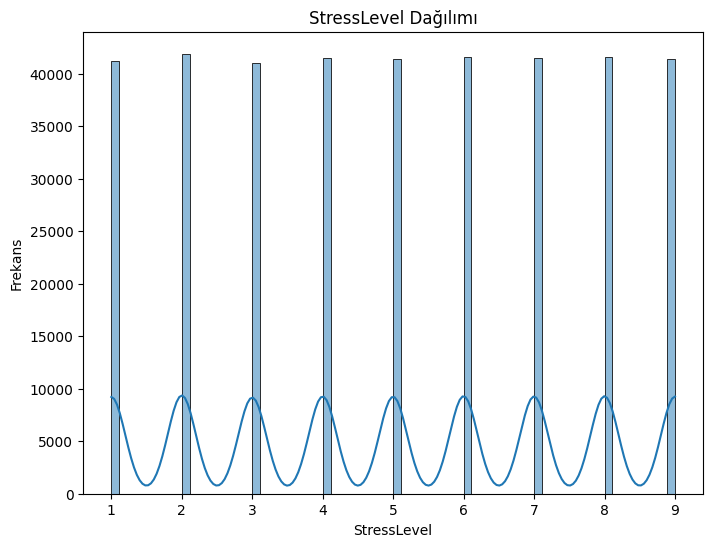

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_selected, x='StressLevel', kde=True)
plt.title('StressLevel Dağılımı')
plt.xlabel('StressLevel')
plt.ylabel('Frekans')
plt.show()

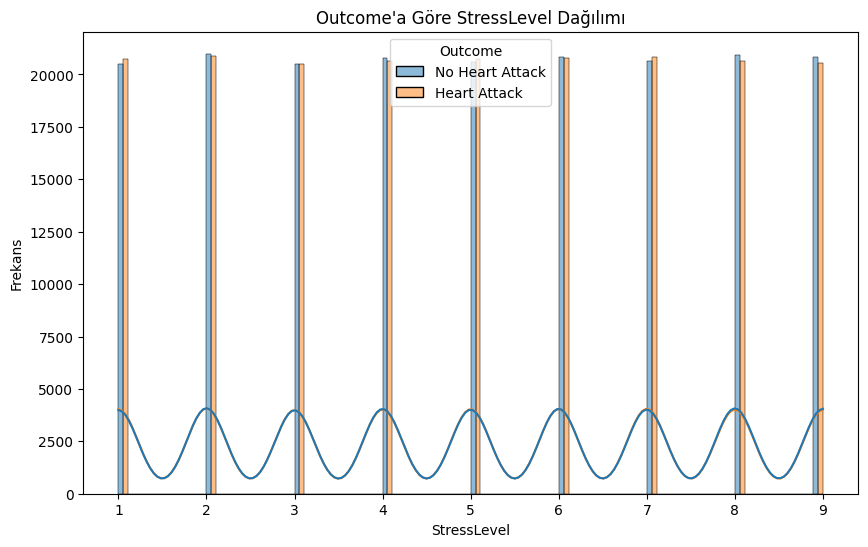

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_selected, x='StressLevel', hue='Outcome', kde=True, multiple='dodge')
plt.title('Outcome\'a Göre StressLevel Dağılımı')
plt.xlabel('StressLevel')
plt.ylabel('Frekans')
plt.show()

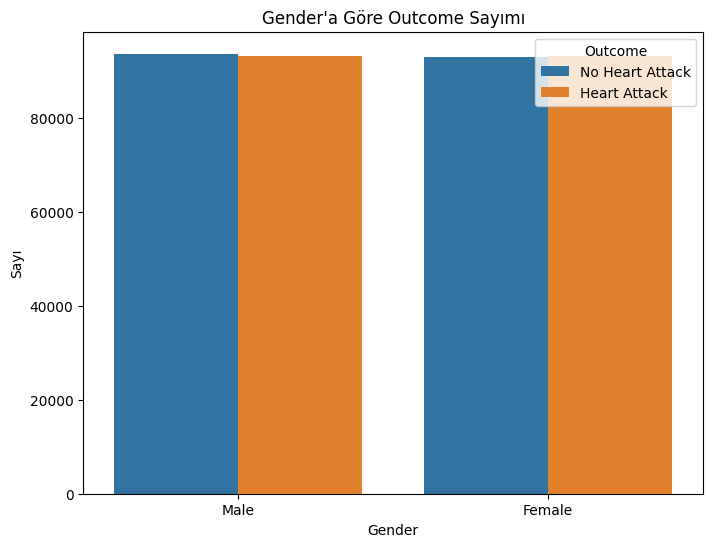

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_selected, x='Gender', hue='Outcome')
plt.title('Gender\'a Göre Outcome Sayımı')
plt.xlabel('Gender')
plt.ylabel('Sayı')
plt.show()

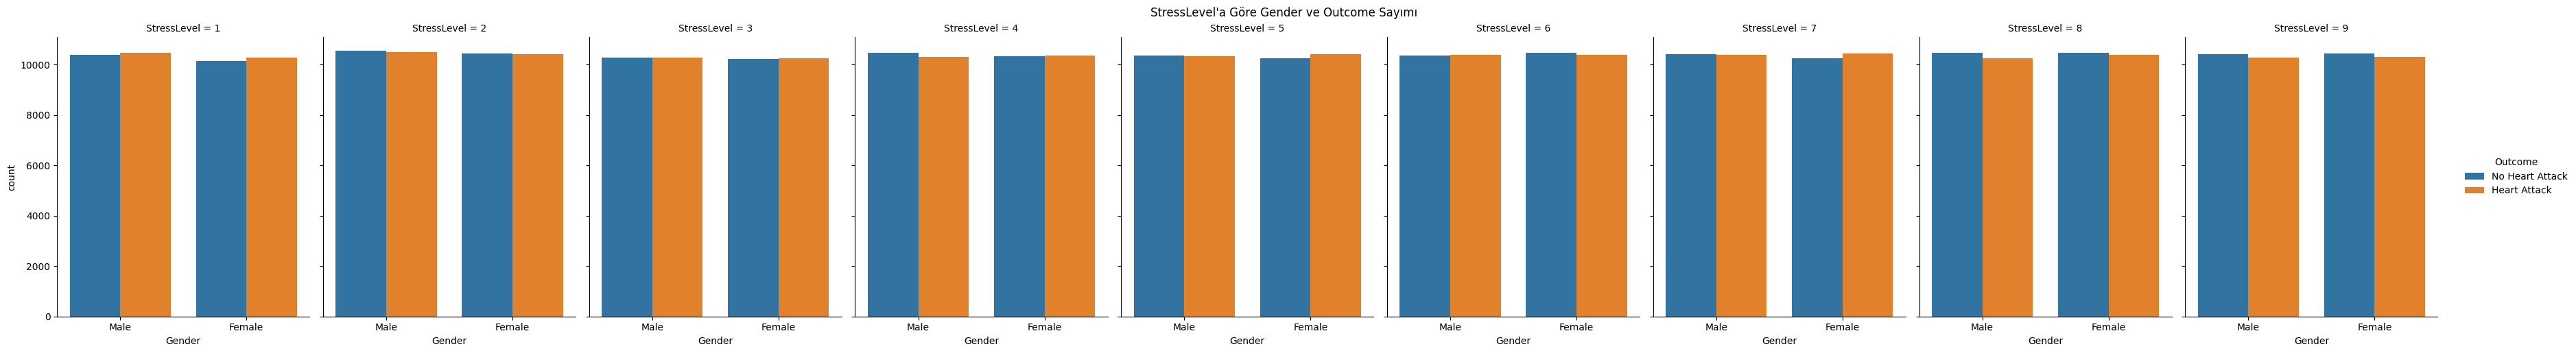

In [11]:
# stresslevel'a göre parçalanmış gender ve outcome grafiği
# sns.countplot yerine sns.catplot kullanıyoruz ve kind='count' belirtiyoruz
# col parametresi ile hangi sütuna göre parçalayacağımızı belirtiyoruz
# height ve aspect ile her bir alt grafiğin boyutunu ayarlayabilirsiniz
sns.catplot(data=df_selected, x='Gender', hue='Outcome', col='StressLevel', kind='count', height=5, aspect=.8)
plt.suptitle('StressLevel\'a Göre Gender ve Outcome Sayımı', y=1.02) # Başlığı yukarı taşıma
plt.show()

In [12]:
# df_selected, sadece 'Outcome', 'Gender' ve 'StressLevel' sütunlarını içeren DataFrame

# 'Outcome' sütununu sayısal formata dönüştürme (Label Encoding)
# Outcome'un ikili olduğunu varsayıyoruz (örn: 'Yes', 'No')
le = LabelEncoder()
df_selected['Outcome_encoded'] = le.fit_transform(df_selected['Outcome'])

# Bağımsız değişkenler (features) ve bağımlı değişken (target)
features = ['StressLevel', 'Gender']
target = 'Outcome_encoded' # Kodlanmış Outcome'u hedef alıyoruz

X = df_selected[features]
y = df_selected[target]

# Kategorik değişkenleri (Gender) işlemek için One-Hot Encoding
categorical_features = ['Gender']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough') # Diğer sütunları (StressLevel) olduğu gibi bırak

# Model pipeline'ı oluşturma
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğitme
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_test)

# Model performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluk Oranı: {accuracy}")

print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

# Modeli kullanarak stresslevel ve gender'ın outcome üzerindeki etkisini analiz etme
# Eğitilmiş modelin katsayılarına bakabilirsiniz.
# Ancak, One-Hot Encoding yapıldığı için katsayılar biraz karmaşık görünebilir.
# Örneğin, cinsiyet için oluşturulan her yeni sütunun katsayısı, o cinsiyetin
# outcome'un (kodlanmış halinin) log-odds'ı üzerindeki etkisini gösterir.
# StressLevel'ın katsayısı ise, StressLevel'daki bir birimlik artışın
# log-odds üzerindeki değişimini gösterir.

<ipython-input-12-eb49d4024099>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Outcome_encoded'] = le.fit_transform(df_selected['Outcome'])


Model Doğruluk Oranı: 0.5014008981835244

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.50      0.61      0.55     37003
           1       0.51      0.39      0.44     37592

    accuracy                           0.50     74595
   macro avg       0.50      0.50      0.50     74595
weighted avg       0.50      0.50      0.50     74595

